In [3]:
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt  

In [4]:
#load dataset
df_original= pd.read_csv("Churn_Modelling.csv")
df = df_original
# show top 5 rows of dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print("Dataset has {} rows and {} Columns".format(df.shape[0],df.shape[1])) 

Dataset has 10000 rows and 14 Columns


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#check for duplicate values
df.duplicated().sum()

0

In [11]:
"""Handling Missing Data"""
def missing_data(df):
     
        # check null values in each column
        print("\nNull values in dataset:\n",df.isnull().sum())
        
        #check for minimum values
        print("\n\nMin values:\n",  df.min())
        
        df.replace(np.NaN, df.mean, inplace = True)
        
        print("\n After replacing minimum values\n",df.min())
        
        # check for duplicate data
#         df.duplicated().sum()
#         print("\nCheck duplicate values:\n",df.duplicated().sum())
missing_data(df)


Null values in dataset:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Min values:
 RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance                   0
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object

 After replacing minimum values
 RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure          

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [13]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [15]:
df.shape

(10000, 11)

In [16]:
# Handle categorical data
# df = pd.get_dummies(df)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df = pd.get_dummies(df)

In [18]:
# get dummy variables whose are in categorical type
# for name in df.columns:
#     if df[name].dtype == "object":
#             df[name] = pd.get_dummies(df[name]) 

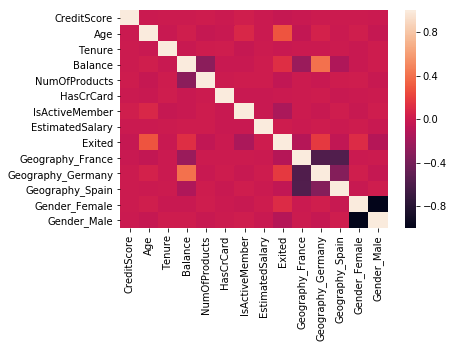

In [19]:
# check the correlation
corr = df.corr()
sb.heatmap(corr)

In [20]:
df.shape

(10000, 14)

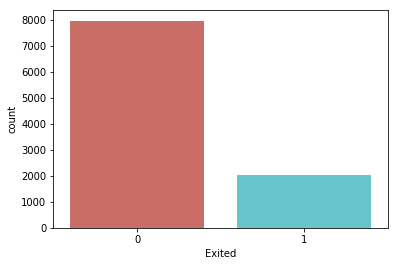

In [21]:
sb.countplot(x='Exited',  data=df, palette='hls')
plt.show()

In [22]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df
df = Feature_Scaling(df)

In [23]:
# seperate data set
def features(df):
    y_new = df.Exited
#     y.head()
    df = df.drop('Exited', axis = 1)
    print("Seperate Exited column from dataset")
    return df, y_new
df, y_new = features(df)

Seperate Exited column from dataset


In [24]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(y_new))
    test_per_y = len(y_new)-train_per_y

    
    y_train_data = np.array(y_new[:train_per_y])
    y_test_data = np.array(y_new[:test_per_y])
    
    #reshpe (1357,) to (1357,1) for train and test dataset
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 7000
Test dataset: 3000

Convert pandas datafrem into numpy

X train data shape: (7000, 13)
y train data shape: (7000, 1)

X test data shape: (3000, 13)
y test data shape: (3000, 1)


In [31]:
class NueralNetwork:
    def __init__(self):
        # assign learning rate
        self.learning_rate = 0.0070
        self.epoch = 1000
        
    def gradientDescent(self, x_train_data,y_train_data, w, b):
        m = len(x_train_data) 
        layers = (x_train_data.shape[1], 4, 5, 3, 1)
        
        z = [0] * len(layers)
        a = [0] * len(layers)
        dg = [0] * len(layers)
        dA = [0] * len(layers)
        dz = [0] * len(layers)
        db = [0] * len(layers)
        dw = [0] * len(layers)
        
#         A = [0] * len(layers)
        a[0] = x_train_data.T
        
        weight = []
        bias = []
        
        for i in range(1, len(layers)):
            weight.append(np.random.rand(layers[i], layers [i-1])*0.001)
            bias.append(np.zeros((layers[i], 1)) )   
            # without brackets it gives TypeError: data type not understood
            
        for j in range(self.epoch):
            for i in range(len(layers) - 1):
                print("\n\nForward : layer = ", i )
                #----------Forward Propagation ---------------
                #hypothesis function
                z[i] = np.dot(weight[i] , a[i]) + bias[i]
                print("z :", z[i].shape)
                # we are not taking a[i - 1] bcoz it taking z (4, 49) shape
                # calculate activation function (sigmoid function)
                a[i+1] = 1 / (1 + np.exp(-z[i]))
                print("a[i]",a[i+1].shape)
                # A[i] = g[i] * (z[i])  --> Activation function * hepo
                
            for i in reversed(range(len(layers) -1)):
                print("!!!!!!!!!!!!!!!!")
                #-------Backword Propogation-------------
                print("Backword : layer = ", i)
                #loss function derivation
                dA[i] = (-(y_train_data.T/ a[i+1]) + ((1 - y_train_data.T) / (1 - a[i+1])))
                print("dA[i] = ", dA[i].shape)
    
                #derivation of sigmoid function
                dg[i] = (1 / (1 + np.exp(-z[i]))) * (1 - (1 / (1 + np.exp(-z[i]))))
#                 dg[i] = a[i+1] * 1 - a[i+1] 
                print("dg[i] = ", dg[i].shape)
                
                dz[i] = dA[i] * dg[i]
                print("dz[i] = ", dz[i].shape)

                dw[i] =  np.dot(dz[i], a[i].T) / m
                print("dw[i] = ", dw[i].shape)

                db[i] = np.sum(dz[i], axis =1 ,keepdims = True) / m
                
                # update weight and bias
                weight[i] = weight[i] - np.dot(self.learning_rate, dw[i])
                bias[i] = bias[i] - np.dot(self.learning_rate, db[i])

        
        return [weight, bias] 
    
    
    def predict(self, x_test_data, parameters):
            #reshape
            a = [0] * 5
            a[0] = x_test_data.T
            z = [0] * 5
            a = [0] * 6
            for i in range(4):  
                z[i] = np.dot(parameters[0][i], a[i]) + parameters[1][i]
                a[i+1] = 1 / (1 + np.exp(-z[i])) 
            return a[-1]
            return y_predict

    def accuracy(self, y_test_data, y_pred_test):
        y_pred_test = np.nan_to_num(y_pred_test)
   
        test_accuracy = 100 - (np.mean(np.abs(y_pred_test - y_test_data)) * 100)        
        return test_accuracy

        
def main(x_train_data, y_train_data, x_test_data, y_test_data):
    # class object created
    obj = NueralNetwork()
    
    print("/nx_train_data shape",x_train_data.shape)
    print("x_test_data shape",x_train_data.shape)
    
    # intialization
    x_col = 48
    
    # create vector for theta's(weights)
    w = np.full((x_col + 1, 1),0.5)
    b = np.zeros((1, 1), dtype = 'float')
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
    print("\n\nx_train_data shape",x_train_data.shape)
    print("x_test_data shape",x_train_data.shape)
    
    parameters = obj.gradientDescent(x_train_data, y_train_data, w, b)

    y_predict_test = obj.predict(x_test_data, parameters)
#     print("y_predict test:",y_predict_test.shape)

    y_predict_train = obj.predict(x_train_data, parameters)
#     print("y_predict train:",y_predict_train.shape)

    train_accuracy=obj.accuracy(y_train_data, y_predict_train)
    test_accuracy=obj.accuracy(y_test_data, y_predict_test)

    print("Accuracy train:", train_accuracy)
    print("Accuracy test:",  test_accuracy)

    
if __name__ == '__main__':
    main(x_train_data, y_train_data, x_test_data, y_test_data)

/nx_train_data shape (7000, 13)
x_test_data shape (7000, 13)


x_train_data shape (7000, 14)
x_test_data shape (7000, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!

Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)


dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : 

dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer = 

dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4,

!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!

dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[

z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =

dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : 

dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000

!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!

dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =

a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)


a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 



Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backwo

a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] = 

a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1

dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : 

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!


a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[

a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)


dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000

Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword

dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : 

a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)


dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer = 

a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =

dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer = 

dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : 

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =

a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 

z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw

a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg

dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!

dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =

Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 

Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!


dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)



dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4,

z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =

a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 

a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 

dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : 

dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[

dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer =  3
z : (1, 7000)
a[i] (1, 7000)
!!!!!!!!!!!!!!!!
Backword : layer =  3
dA[i] =  (1, 7000)
dg[i] =  (1, 7000)
dz[i] =  (1, 7000)
dw[i] =  (1, 3)
!!!!!!!!!!!!!!!!
Backword : layer =  2
dA[i] =  (3, 7000)
dg[i] =  (3, 7000)
dz[i] =  (3, 7000)
dw[i] =  (3, 5)
!!!!!!!!!!!!!!!!
Backword : layer =  1
dA[i] =  (5, 7000)
dg[i] =  (5, 7000)
dz[i] =  (5, 7000)
dw[i] =  (5, 4)
!!!!!!!!!!!!!!!!
Backword : layer =  0
dA[i] =  (4, 7000)
dg[i] =  (4, 7000)
dz[i] =  (4, 7000)
dw[i] =  (4, 14)


Forward : layer =  0
z : (4, 7000)
a[i] (4, 7000)


Forward : layer =  1
z : (5, 7000)
a[i] (5, 7000)


Forward : layer =  2
z : (3, 7000)
a[i] (3, 7000)


Forward : layer = 